In [1]:
!python -m pip install -r requirements.txt pydmd~=0.3.3

Defaulting to user installation because normal site-packages is not writeable


You should consider upgrading via the 'C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\python.exe -m pip install --upgrade pip' command.


In [2]:
import numpy as np
from matplotlib import pyplot as plt
from pydmd import DMD

In [3]:
def f1(x, t): 
    return 1.0 / np.cosh(x + 3.0) * np.exp(2.3J * t)

def f2(x, t):
    return 2.0 / np.cosh(x) * np.tanh(x) * np.exp(2.8J * t)

x = np.linspace(-5.0, 5.0, 2 ** 10 + 1)
t = np.linspace(0.0, 4.0 * np.pi, 2 ** 8 + 1)

xgrid, tgrid = np.meshgrid(x, t)

X1 = f1(xgrid, tgrid)
X2 = f2(xgrid, tgrid)
X = X1 + X2

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  import sys


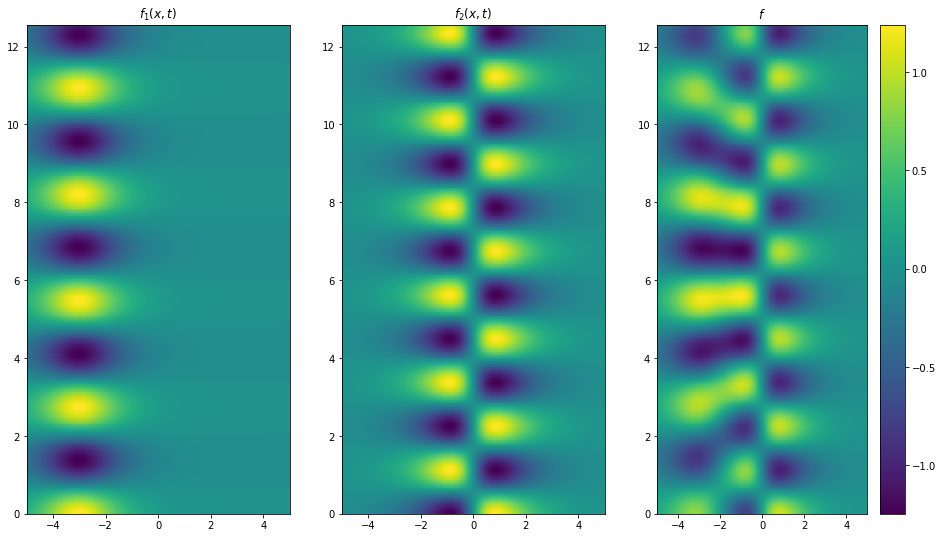

In [4]:
titles = ['$f_1(x,t)$', '$f_2(x,t)$', '$f$']
data = [X1, X2, X]

fig = plt.figure(figsize=(16, 9))
for n, title, d in zip(range(131, 134), titles, data):
    plt.subplot(n)
    plt.pcolor(xgrid, tgrid, d.real)
    plt.title(title)
plt.colorbar()
plt.show()

In [5]:
from numpy.linalg import lstsq, pinv, norm

n = len(x)
A = X[1:].T @ pinv(X[:-1].T, rcond=1E-15)
assert A.shape == (n, n)

A_second = np.empty(shape=(n, n), dtype=complex)
for i in range(n):
    A_second[i] = lstsq(X[:-1], X[1:].T[i])[0]
# assert np.allclose(A @ X[0], A_second @ X[0])
norm((A @ X.T) - (A_second @ X.T))

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  if __name__ == '__main__':


5.855776377761995e-13